In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
plt.style.available

In [2]:
def get_string(filename):
    directions_string = ''
    with open(filename) as f:
        directions_string = f.read()
        moves = directions_string.count('F')
        string_length = len(directions_string)
        f.close()
    return string_length, moves, directions_string

In [3]:
def get_point(directions_string):
    
    listofx=[0,]
    listofy=[0,]
    listofpoints=[(0,0)]
    listofcount =[]
    alpha = np.pi/2
    x=0
    y=0
    for i in range(len(directions_string)):
    
        if directions_string[i] =='F':

            x = x + int(np.cos(alpha))
            y = y + int(np.sin(alpha)) 

            point = (x,y)    
            listofx.append(x)
            listofy.append(y)
            listofpoints.append(point)


        elif directions_string[i] =='L':

            alpha = alpha + np.pi/2

        elif directions_string[i]=='R':

            alpha = alpha - np.pi/2 

        else:
            print("Direction %s is not understood, skipping %s!" %(contents[i],contents[i]))
    return listofpoints, listofx, listofy   

List of strings length :   [1439, 3828, 768, 5117, 6659, 5115]
Total length of strings:   22926
List of moves:   [554, 1495, 304, 2009, 2631, 2060]
Total number of moves:   9053


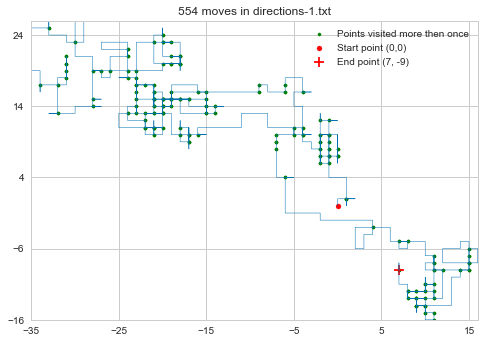

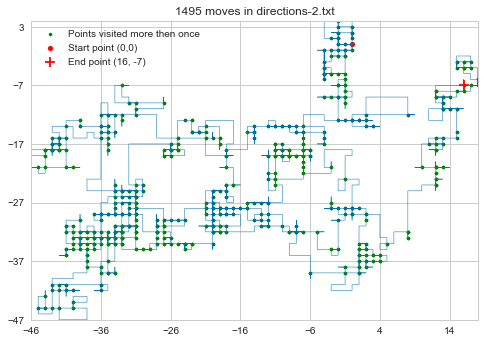

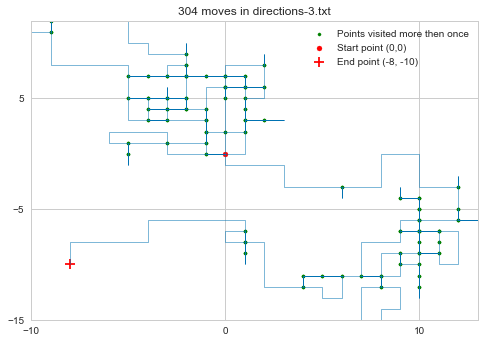

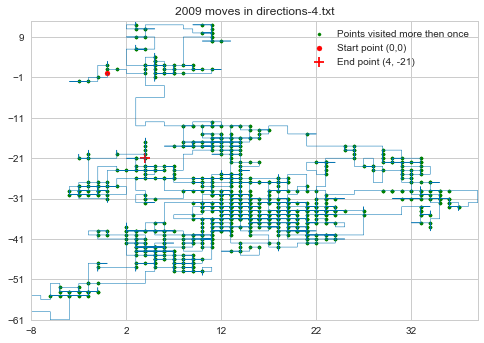

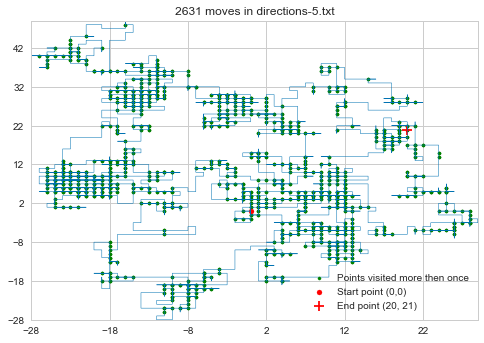

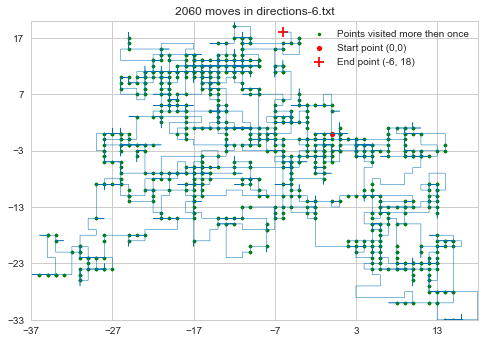

In [102]:
numberoffiles= 6

plt.style.use('seaborn-whitegrid')

strings_length = []
number_of_moves = []
for l in range(numberoffiles):
    listofcount=[]
    filename = 'directions-' + str(l+1) + '.txt'
    string_length, moves, directions_string = get_string(filename)
    listofpoints, listofx, listofy = get_point(directions_string)
    for elem in listofpoints:
        p=listofpoints.count(elem)
        listofcount.append(p>1)
    lastpoint = elem
    nonuniq_x = np.array(listofx)[listofcount]    
    nonuniq_y = np.array(listofy)[listofcount]
        
    minx = min(listofx)
    maxx = max(listofx)
    miny = min(listofy)
    maxy = max(listofy)

    fig, ax = plt.subplots()
    ax.scatter(nonuniq_x, nonuniq_y, c='g',s=40, marker=".", label = "Points visited more then once")
    ax.step(listofx, listofy, linewidth=0.5)
    ax.set_title(str(moves) + ' moves in ' + str(filename))
    ax.set(xlim=(minx, maxx), xticks=np.arange(minx, maxx, 10),
             ylim=(miny, maxy), yticks=np.arange(miny, maxy, 10))
    ax.scatter(x=0, y=0, c='r',s=100, marker=".", label = ("Start point (0,0)"))
    ax.scatter(lastpoint[0], lastpoint[1], c='r', s=100, marker="+", label = ("End point "+ str(lastpoint)))
    
    plt.legend()
    strings_length.append(string_length)
    number_of_moves.append(moves)


print("List of strings length :  ", strings_length)

print("Total length of strings:  ", np.sum(strings_length))

print("List of moves:  ", number_of_moves)

print("Total number of moves:  ", np.sum(number_of_moves))
